In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
!mkdir /content/files
os.chdir('/content/files')
!gdown 1V8HOw3BLIk5ZYMcMgzHPNqt9GxU5jTut
!gdown 1O1d32HU9bKvvqLill5ogDFdQ0e5rMvOx
!gdown 1AanuBUBAYigNQn0h8iLA1Z096I-S9UqZ
!gdown 1LiqDEFRRofNNNjUrcy770sKXzUAeYawA
!gdown 1RjJ8IHWCmU65sRTPfAUyXTR3kTZ7ez2y
!gdown 18bXJWtYQgjWFyepsj-Vc-Hwuf-NdUsKQ
!unzip x_val.zip
!unzip x_test.zip
!unzip x_train.zip
!unzip y_test.zip
!unzip y_train.zip
!unzip y_val.zip

Downloading...
From (original): https://drive.google.com/uc?id=1V8HOw3BLIk5ZYMcMgzHPNqt9GxU5jTut
From (redirected): https://drive.google.com/uc?id=1V8HOw3BLIk5ZYMcMgzHPNqt9GxU5jTut&confirm=t&uuid=992a75fa-9f20-423a-b1b4-8d1608532669
To: /content/files/x_train.zip
100% 121M/121M [00:02<00:00, 54.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1O1d32HU9bKvvqLill5ogDFdQ0e5rMvOx
To: /content/files/x_test.zip
100% 6.74M/6.74M [00:00<00:00, 160MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AanuBUBAYigNQn0h8iLA1Z096I-S9UqZ
To: /content/files/x_val.zip
100% 6.76M/6.76M [00:00<00:00, 125MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LiqDEFRRofNNNjUrcy770sKXzUAeYawA
To: /content/files/y_val.zip
100% 154k/154k [00:00<00:00, 65.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RjJ8IHWCmU65sRTPfAUyXTR3kTZ7ez2y
To: /content/files/y_train.zip
100% 2.74M/2.74M [00:00<00:00, 160MB/s]
Downloading...
From: https://drive.google.com/uc?id=18bXJWtYQgjWFyepsj-Vc-H

In [3]:
x_train = pd.read_csv('/content/files/x_train.csv')
y_train = pd.read_csv('/content/files/y_train.csv')
x_val = pd.read_csv('/content/files/x_val.csv')
y_val = pd.read_csv('/content/files/y_val.csv')
x_test = pd.read_csv('/content/files/x_test.csv')
y_test = pd.read_csv('/content/files/y_test.csv')

In [4]:
x_train.head()

,Unnamed: 0,log_days_difference,log_likes_per_day,log_dislikes_per_day,log_comments_per_day,trending_count,days_difference,month_April,month_August,month_December,...,categoryId_Gaming,categoryId_Howto & Style,categoryId_Music,categoryId_News & Politics,categoryId_Nonprofits & Activism,categoryId_People & Blogs,categoryId_Pets & Animals,categoryId_Science & Technology,categoryId_Sports,categoryId_Travel & Events
0,0,1.791759,9.030663,4.231204,6.527958,2,5,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,1,1.386294,9.235748,0.000000,7.567863,1,3,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,2,1.609438,8.808369,0.000000,6.289716,2,4,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,3,1.791759,10.528072,0.000000,7.208452,4,5,True,False,False,...,False,False,True,False,False,False,False,False,False,False
4,4,1.098612,7.133695,0.000000,5.141664,0,2,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [5]:
tag_column = [col for col in x_train.columns if col.startswith('tag')]
desc_column = [col for col in x_train.columns if col.startswith('desc')]
title_column = [col for col in x_train.columns if col.startswith('title')]
date_column = [col for col in x_train.columns if col.startswith('month') or col.startswith('day')]

drop_columns = tag_column + desc_column + title_column + date_column + ['Unnamed: 0', 'categoryId']

x_train = x_train.drop(drop_columns, axis=1)
x_test = x_test.drop(drop_columns, axis=1)
x_val = x_val.drop(drop_columns, axis=1)
y_train = y_train.drop(['Unnamed: 0'], axis=1)
y_test = y_test.drop(['Unnamed: 0'], axis=1)
y_val = y_val.drop(['Unnamed: 0'], axis=1)

print(x_train.head())
print(x_train.columns)

   log_days_difference  log_likes_per_day  log_dislikes_per_day  \
0             1.791759           9.030663              4.231204   
1             1.386294           9.235748              0.000000   
2             1.609438           8.808369              0.000000   
3             1.791759          10.528072              0.000000   
4             1.098612           7.133695              0.000000   

   log_comments_per_day  trending_count  categoryId_Autos & Vehicles  \
0              6.527958               2                        False   
1              7.567863               1                        False   
2              6.289716               2                        False   
3              7.208452               4                        False   
4              5.141664               0                        False   

   categoryId_Comedy  categoryId_Education  categoryId_Entertainment  \
0              False                 False                     False   
1              False

In [6]:
x_train = x_train[['log_days_difference', 'log_likes_per_day', 'log_dislikes_per_day', 'log_comments_per_day', 'trending_count']]
x_test = x_test[['log_days_difference', 'log_likes_per_day', 'log_dislikes_per_day', 'log_comments_per_day', 'trending_count']]

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Parameters: {'criterion': 'squared_error', 'max_depth': 11, 'min_samples_leaf': 38, 'min_samples_split': 148}
Training MSE: 0.2984122697126005
Validation MSE: 0.31099077382274387
--------------------
Parameters: {'criterion': 'squared_error', 'max_depth': 11, 'min_samples_leaf': 38, 'min_samples_split': 149}
Training MSE: 0.29842986385231446
Validation MSE: 0.31097180374732586
--------------------
Parameters: {'criterion': 'squared_error', 'max_depth': 11, 'min_samples_leaf': 38, 'min_samples_split': 150}
Training MSE: 0.29846709550775785
Validation MSE: 0.3109911462552853
--------------------
Parameters: {'criterion': 'squared_error', 'max_depth': 11, 'min_samples_leaf': 38, 'min_samples_split': 151}
Training MSE: 0.2985115286933694
Validation MSE: 0.31099421428603014
--------------------
Parameters: {'criterion': 'squared_error', 'max_depth': 11, 'min_samples_leaf': 38, 'min_samples_split': 152}
Training MSE: 0.29853748801829855
Validation MSE: 0.3110112115545792
--------------------

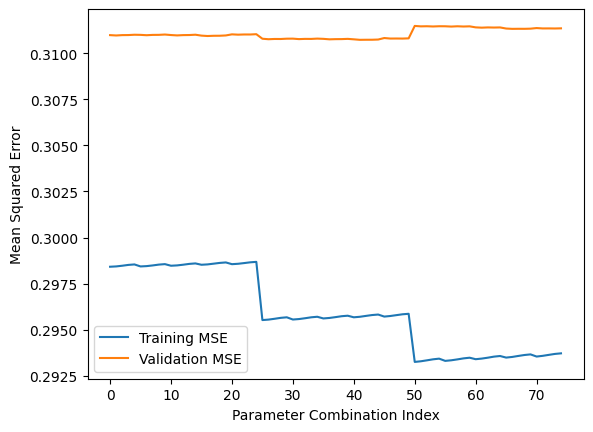

In [7]:
param_grid = {
    'criterion': ['squared_error'],
    'max_depth': [11, 12, 13],
    'min_samples_split': [148, 149, 150, 151, 152],
    'min_samples_leaf': [38, 39, 40, 41, 42]
}

model = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5,
                           return_train_score=True)

grid_search.fit(x_train, y_train)

train_scores = -grid_search.cv_results_['mean_train_score']
val_scores = -grid_search.cv_results_['mean_test_score']

params = grid_search.cv_results_['params']

for i in range(len(params)):
    print(f"Parameters: {params[i]}")
    print(f"Training MSE: {train_scores[i]}")
    print(f"Validation MSE: {val_scores[i]}")
    print("-" * 20)

plt.plot(train_scores, label='Training MSE')
plt.plot(val_scores, label='Validation MSE')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [8]:
print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Hyperparameters: {'criterion': 'squared_error', 'max_depth': 12, 'min_samples_leaf': 41, 'min_samples_split': 149}


In [9]:
# Parameters: {'criterion': 'squared_error', 'max_depth': 12, 'min_samples_leaf': 41, 'min_samples_split': 149}
# Training MSE: 0.29569459846079843
# Validation MSE: 0.3107352380895637

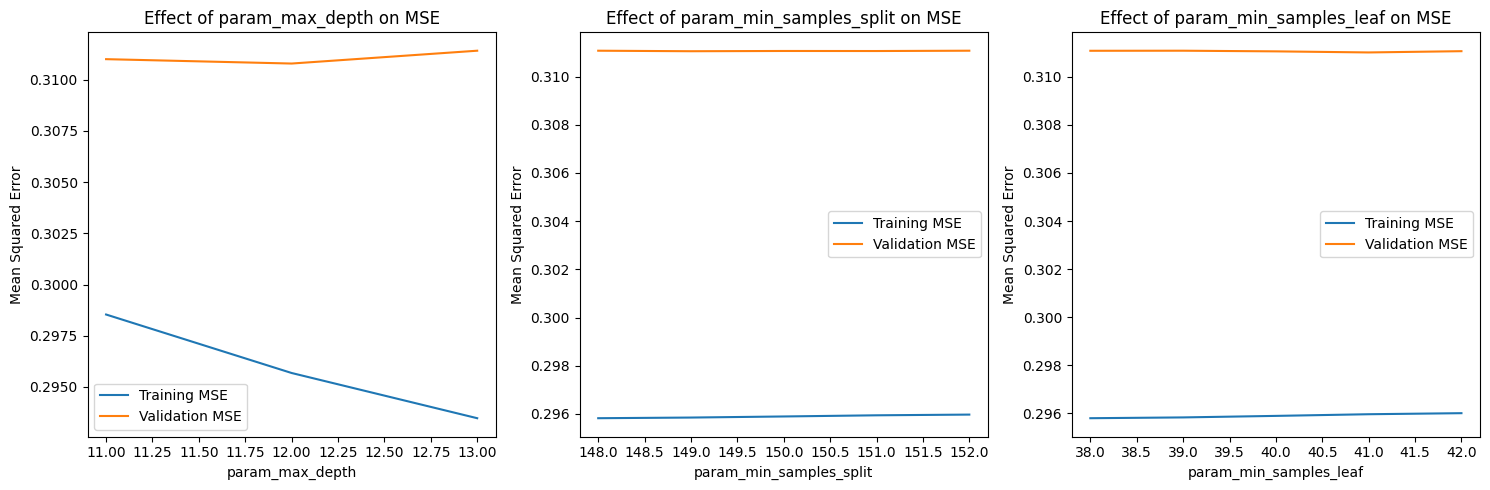

In [10]:
results_df = pd.DataFrame(grid_search.cv_results_)

plot_cols = ['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf',
             'mean_train_score', 'mean_test_score']
plot_df = results_df[plot_cols]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, param in enumerate(['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf']):

    param_groups = plot_df.groupby(param)[['mean_train_score', 'mean_test_score']].mean()

    axes[i].plot(param_groups.index, -param_groups['mean_train_score'], label='Training MSE')
    axes[i].plot(param_groups.index, -param_groups['mean_test_score'], label='Validation MSE')

    axes[i].set_title(f'Effect of {param} on MSE')
    axes[i].set_xlabel(param)
    axes[i].set_ylabel('Mean Squared Error')
    axes[i].legend()

plt.tight_layout()
plt.show()

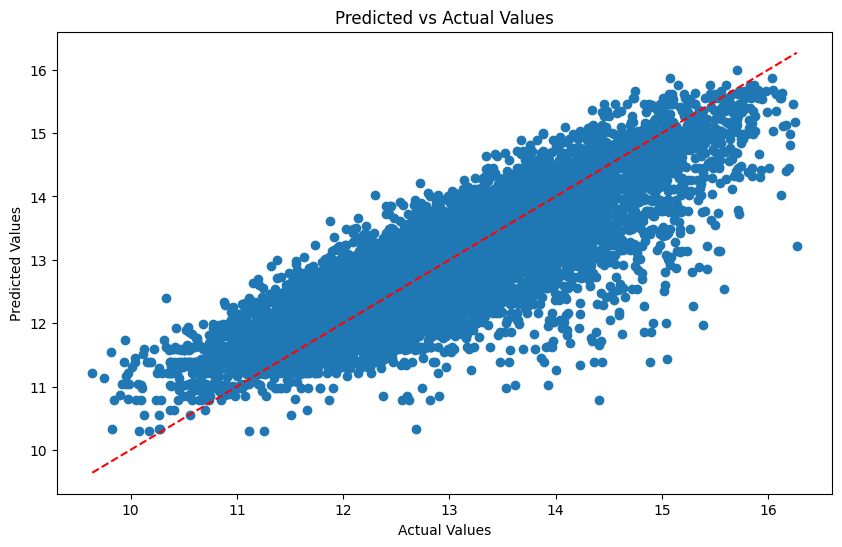

In [11]:
y_pred = grid_search.predict(x_test)

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, label='Predicted vs Actual')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction (y = x)')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')

plt.show()
